# –ê–Ω–∞–ª—ñ–∑ –µ–º–æ—Ü—ñ–π

–í —Ä–æ–±–æ—Ç—ñ —Ä–æ–∑–≥–ª—è–Ω—É—Ç–µ –≤–∏–∑–Ω–∞—á–µ–Ω–Ω—è –µ–º–æ—Ü—ñ–π–Ω–æ–≥–æ –∑–∞–±–∞—Ä–≤–ª–µ–Ω–Ω—è —Ç–µ–∫—Å—Ç–æ–≤–∏—Ö –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å —ñ–∑
[–≤–∏–±—ñ—Ä–∫–∏](https://www.kaggle.com/datasets/nursyahrina/chat-sentiment-dataset), —â–æ –∑–≥–µ–Ω–µ—Ä–æ–≤–∞–Ω–∞ ChatGPT. –°—É–º–∞—Ä–Ω–æ 584
–¥–æ–∫—É–º–µ–Ω—Ç–∏ –º–∞—é—Ç—å –æ–¥–Ω—É –∑ —Ç—Ä—å–æ—Ö –ø–æ–∑–Ω–∞—á–æ–∫ ‚Äî `positive`, `neutral` —Ç–∞ `negative`. –ü–æ—Ç—Ä—ñ–±–Ω–æ —Å—Ç–≤–æ—Ä–∏—Ç–∏ –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ç–æ—Ä, —â–æ –¥–ª—è
–∑–∞–¥–∞–Ω–æ–≥–æ —Ç–µ–∫—Å—Ç—É –≤–∏–∑–Ω–∞—á–∞—Ç–∏–º–µ –π–æ–≥–æ –µ–º–æ—Ü—ñ–π–Ω–µ –∑–∞–±–∞—Ä–≤–ª–µ–Ω–Ω—è.

In [1]:
from matplotlib.pyplot import subplots
from numpy import arange
from pandas import read_csv
from seaborn import set_style, barplot, heatmap
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
set_style('darkgrid')

In [3]:
chat = read_csv('data/chat_dataset.csv')

In [4]:
chat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   message    584 non-null    object
 1   sentiment  584 non-null    object
dtypes: object(2)
memory usage: 9.3+ KB


In [5]:
chat.head(10)

message sentiment
0          I really enjoyed the movie  positive
1               The food was terrible  negative
2  I'm not sure how I feel about this   neutral
3           The service was excellent  positive
4              I had a bad experience  negative
5             This is a great product  positive
6           I wouldn't recommend this  negative
7             The price is a bit high   neutral
8        The weather is perfect today  positive
9             The traffic is horrible  negative

–•–æ—á–∞ –¥–∞—Ç–∞—Å–µ—Ç —î —Å–∏–Ω—Ç–µ—Ç–∏—á–Ω–∏–º —ñ –π–æ–≥–æ –∫–ª–∞—Å–∏ –Ω–µ —î —ñ–¥–µ–∞–ª—å–Ω–æ –∑–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∏–º–∏, –≤ –ø–æ–¥–∞–ª—å—à–∏—Ö –æ–±—á–∏—Å–ª–µ–Ω–Ω—è—Ö –≤–≤–∞–∂–∞—Ç–∏–º–µ–º–æ —ó—Ö —Ç–∞–∫–∏–º–∏,
—â–æ –Ω–µ –ø–æ—Ç—Ä–µ–±—É—é—Ç—å –∑–≤–∞–∂—É–≤–∞–Ω–Ω—è –∑–∞ —Ä–æ–∑–º—ñ—Ä–æ–º.

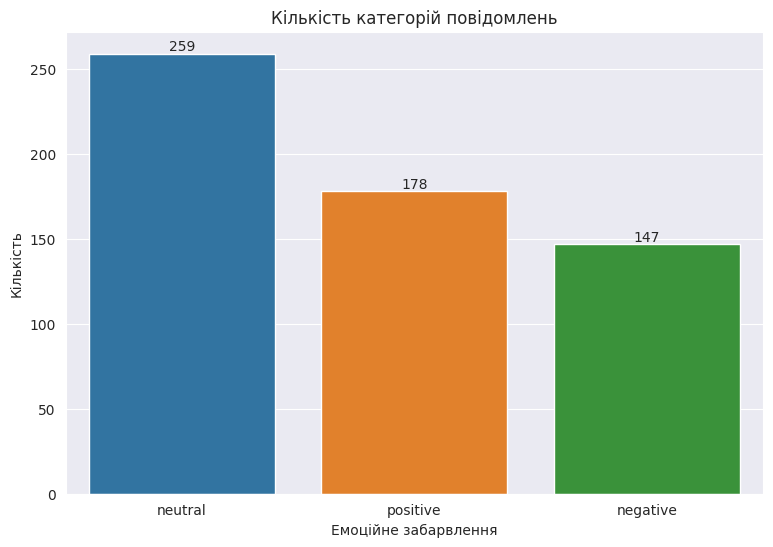

In [6]:
sentiment_counts = chat['sentiment'].value_counts()
axes = subplots(figsize=(9, 6))[1]
barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes)
for container in axes.containers:
    axes.bar_label(container)
axes.set_title('–ö—ñ–ª—å–∫—ñ—Å—Ç—å –∫–∞—Ç–µ–≥–æ—Ä—ñ–π –ø–æ–≤—ñ–¥–æ–º–ª–µ–Ω—å')
axes.set_xlabel('–ï–º–æ—Ü—ñ–π–Ω–µ –∑–∞–±–∞—Ä–≤–ª–µ–Ω–Ω—è')
axes.set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å');

In [7]:
train_messages, test_messages, train_sentiments, test_sentiments = train_test_split(
    chat['message'],
    chat['sentiment'],
    test_size=0.25,
    stratify=chat['sentiment']
)

## –õ–æ–≥—ñ—Å—Ç–∏—á–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è

–û—Å–∫—ñ–ª—å–∫–∏ –º–∏ –ø—Ä–∞—Ü—é—î–º–æ –∑ —Ç–µ–∫—Å—Ç–æ–º, –≤ –ø–∞–π–ø–ª–∞–π–Ω –æ–±—Ä–æ–±–∫–∏ —Å–ª—ñ–¥ –¥–æ–¥–∞—Ç–∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä. –î–ª—è —Ü—å–æ–≥–æ –±—É–≤ –æ–±—Ä–∞–Ω–∏–π
[CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html),
—â–æ –¥–æ–±—Ä–µ —Å–µ–±–µ –∑–∞—Ä–µ–∫–æ–º–µ–Ω–¥—É–≤–∞–≤ —É –ø–æ–¥—ñ–±–Ω–∏—Ö –∑–∞–¥–∞—á–∞—Ö. –û—Å–∫—ñ–ª—å–∫–∏ –π–æ–≥–æ –≤–∏–≤–µ–¥–µ–Ω–Ω—è —î —Ä–æ–∑—Ä—ñ–¥–∂–µ–Ω–æ—é –º–∞—Ç—Ä–∏—Ü–µ—é, –¥–ª—è –∑–º–µ–Ω—à–µ–Ω–Ω—è
—Ä–æ–∑–º—ñ—Ä–Ω–æ—Å—Ç—ñ –∑–∞–º—ñ—Å—Ç—å PCA –æ–±—Ä–∞–Ω–æ
[TruncatedSVD](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html). –ê –Ω–∞–π–ø–µ—Ä—à–∏–º
–∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –∫–ª–∞—Å–∏—Ñ—ñ–∫–∞—Ü—ñ—ó –æ–±—Ä–∞–Ω–∞ —Å—Ç–∞—Ä–∞ –¥–æ–±—Ä–∞
[LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [8]:
logistic_regression_pipeline = make_pipeline(
    CountVectorizer(),
    TruncatedSVD(),
    LogisticRegression(max_iter=300)
)

–í –ø—Ä–æ—Å—Ç–æ—Ä—ñ –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ —Ç–∞–∫–æ–∂ –∑–∞–¥–∞—î–º–æ –æ–ø—Ü—ñ—ó –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä–∞ ‚Äî –º–æ–∂–ª–∏–≤—ñ—Å—Ç—å —ñ–Ω–∂–µ–Ω–µ—Ä–∏—Ç–∏ –Ω–µ —Ç—ñ–ª—å–∫–∏ –ø–æ–æ–¥–∏–Ω–æ–∫—ñ —Å–ª–æ–≤–∞, –∞ –π
–±—ñ–≥—Ä–∞–º–∏.

In [9]:
logistic_regression_distributions = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'truncatedsvd__n_components': [5, 50, 500],
    'logisticregression__C': 10.0 ** arange(-2, 3, 1)
}

–¢—É—Ç –∑–∞–¥–∞—î–º–æ [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)
—É—Å—ñ—Ö –æ–ø—Ü—ñ–π –∑—ñ
[StratifiedKFold](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) 
–∫—Ä–æ—Å-–≤–∞–ª—ñ–¥–∞—Ü—ñ—î—é –Ω–∞ 5 —Ñ—Ä–∞–≥–º–µ–Ω—Ç—ñ–≤.

In [10]:
logistic_regression_cv = GridSearchCV(
    logistic_regression_pipeline,
    logistic_regression_distributions,
    n_jobs=4,
    cv=5
)

In [11]:
%%time
logistic_regression_cv.fit(train_messages, train_sentiments);

CPU times: user 1.67 s, sys: 1.85 s, total: 3.52 s
Wall time: 5.92 s


In [12]:
logistic_regression_cv.best_score_

0.7900470219435738

In [13]:
logistic_regression_cv.best_params_

{'countvectorizer__ngram_range': (1, 2),
 'logisticregression__C': 100.0,
 'truncatedsvd__n_components': 500}

In [14]:
predicted_sentiments = logistic_regression_cv.best_estimator_.predict(test_messages)

In [15]:
accuracy_score(test_sentiments, predicted_sentiments)

0.8493150684931506

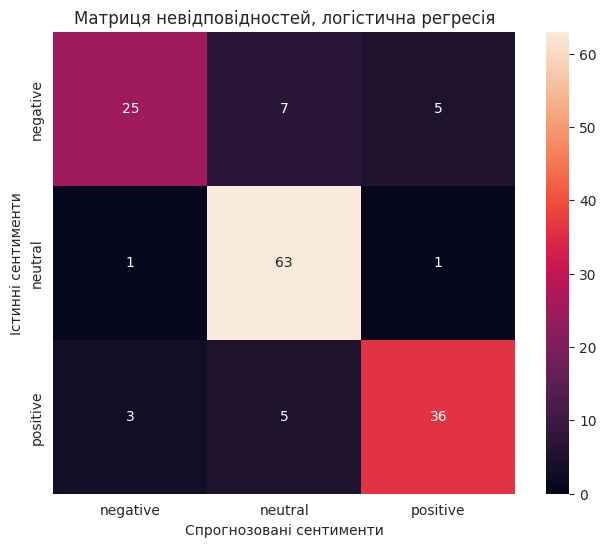

In [16]:
axes = subplots(figsize=(8, 6))[1]
matrix = confusion_matrix(test_sentiments, predicted_sentiments)
labels = logistic_regression_cv.best_estimator_['logisticregression'].classes_
chart = heatmap(
    matrix,
    annot=True,
    ax=axes,
    vmin=0,
    fmt='d',
    square=True
)
chart.set_xticklabels(labels)
chart.set_yticklabels(labels)
axes.set_title('–ú–∞—Ç—Ä–∏—Ü—è –Ω–µ–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—Å—Ç–µ–π, –ª–æ–≥—ñ—Å—Ç–∏—á–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è')
axes.set_xlabel('–°–ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏')
axes.set_ylabel('–Ü—Å—Ç–∏–Ω–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏');

–Ø–∫ –±–∞—á–∏–º–æ, –Ω–∞–π–±—ñ–ª—å—à–µ –ø–æ–º–∏–ª–æ–∫ —Å–µ—Ä–µ–¥ –Ω–µ–≥–∞—Ç–∏–≤–Ω–∏—Ö –≤—ñ–¥–≥—É–∫—ñ–≤, —â–æ –≤–≤–∞–∂–∞—é—Ç—å—Å—è –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–∏–º–∏.

In [46]:
test_messages[(test_sentiments == 'negative') & (predicted_sentiments == 'neutral')]

132                                 I did not enjoy this
145                            This is a useless product
34                            This product is overpriced
160                             The hotel was overpriced
157                    The view from here is unappealing
133                                 The car is expensive
499    I'm so sick and tired of feeling sick and tire...
135              The service at this restaurant was poor
573    I have to work on Saturday this week and I was...
149                   The service at this hotel was poor
Name: message, dtype: object

## –í–∏–ø–∞–¥–∫–æ–≤–∏–π –ª—ñ—Å

–ê —Ç–µ–ø–µ—Ä –ø–µ—Ä–µ–≤—ñ—Ä–∏–º–æ –∞–Ω—Å–∞–º–±–ª—ñ —É –≤–∏–≥–ª—è–¥—ñ
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).
–¢—É—Ç —Ç–æ–π —Å–∞–º–∏–π –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ç–æ—Ä, –∞–ª–µ –±–µ–∑ –º–∞—Å—à—Ç–∞–±—É–≤–∞–Ω–Ω—è –æ–∑–Ω–∞–∫ —á–∏ –∑–º–µ–Ω—à–µ–Ω–Ω—è —Ä–æ–∑–º—ñ—Ä–Ω–æ—Å—Ç—ñ.

In [18]:
random_forest_pipeline = make_pipeline(CountVectorizer(), RandomForestClassifier())

In [19]:
random_forest_distributions = {
    'countvectorizer__ngram_range': [(1, 1), (1, 2)],
    'randomforestclassifier__n_estimators': [1, 5, 20, 50, 100, 200],
    'randomforestclassifier__max_depth': [None, 2, 5, 20],
    'randomforestclassifier__min_samples_split': [2, 5, 10],
    'randomforestclassifier__min_samples_leaf': [1, 2, 5],
    'randomforestclassifier__max_leaf_nodes': [None, 2, 5, 10]
}

–ê —Ç—É—Ç –Ω–∞—Å–ø—Ä–∞–≤–¥—ñ –≤–µ–ª–∏–∫–∏–π –ø—Ä–æ—Å—Ç—ñ—Ä –≥—ñ–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤, –¥–ª—è –ø—Ä–∏—Å–∫–æ—Ä–µ–Ω–Ω—è –æ–±—á–∏—Å–ª–µ–Ω–Ω—è –≤–∏–∫–æ—Ä–∏—Å—Ç–∞—î–º–æ –≤–∏–±—ñ—Ä–∫–æ–≤—É
[RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In [20]:
random_forest_cv = RandomizedSearchCV(
    random_forest_pipeline,
    random_forest_distributions,
    n_iter=100,
    n_jobs=8,
    cv=5
)

In [21]:
%%time
random_forest_cv.fit(train_messages, train_sentiments);

CPU times: user 577 ms, sys: 72.7 ms, total: 650 ms
Wall time: 8.19 s


In [22]:
random_forest_cv.best_score_

0.7467084639498431

–î–æ —Ä–µ—á—ñ, –∑–∞–±–∞–≤–Ω–æ, —â–æ –≤–∏–ø–∞–¥–∫–æ–≤–∏–π –ª—ñ—Å –æ–±–∏—Ä–∞—î —è–∫–æ–º–æ–≥–∞ –±—ñ–ª—å—à–µ "—Å–ª–∞–±–∫–∏—Ö —É—á–Ω—ñ–≤" –∑–∞–º—ñ—Å—Ç—å –æ–±–º–µ–∂–µ–Ω—å –ø–æ —Ä–æ—Å—Ç—É –π –ø–æ–¥—ñ–ª—É –≤—É–∑–ª—ñ–≤.

In [23]:
random_forest_cv.best_params_

{'randomforestclassifier__n_estimators': 50,
 'randomforestclassifier__min_samples_split': 10,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__max_leaf_nodes': None,
 'randomforestclassifier__max_depth': None,
 'countvectorizer__ngram_range': (1, 1)}

In [24]:
predicted_sentiments = random_forest_cv.best_estimator_.predict(test_messages)

In [25]:
accuracy_score(test_sentiments, predicted_sentiments)

0.8013698630136986

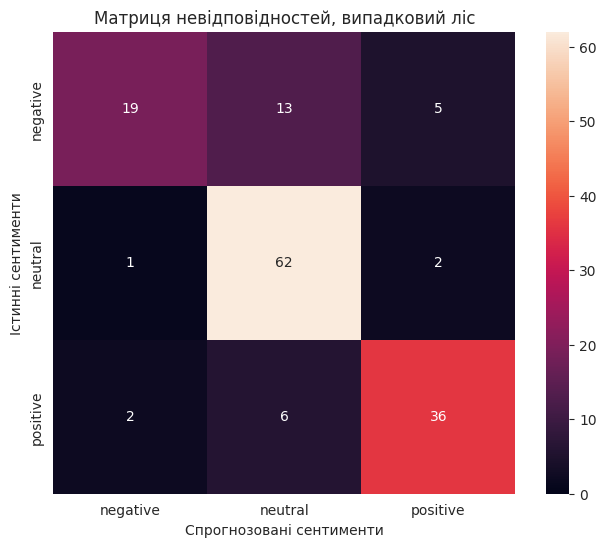

In [26]:
axes = subplots(figsize=(8, 6))[1]
matrix = confusion_matrix(test_sentiments, predicted_sentiments)
labels = random_forest_cv.best_estimator_['randomforestclassifier'].classes_
chart = heatmap(
    matrix,
    annot=True,
    ax=axes,
    vmin=0,
    fmt='d',
    square=True
)
chart.set_xticklabels(labels)
chart.set_yticklabels(labels)
axes.set_title('–ú–∞—Ç—Ä–∏—Ü—è –Ω–µ–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—Å—Ç–µ–π, –≤–∏–ø–∞–¥–∫–æ–≤–∏–π –ª—ñ—Å')
axes.set_xlabel('–°–ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏')
axes.set_ylabel('–Ü—Å—Ç–∏–Ω–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏');

–ó–∞–±–∞–≤–Ω–æ, —Ü—è –º–æ–¥–µ–ª—å —Ç–∞–∫–æ–∂ —Ä–æ–±–∏—Ç—å –Ω–µ–º–∞–ª–æ –ø–æ–º–∏–ª–æ–∫ —Å–µ—Ä–µ–¥ –Ω–µ–≥–∞—Ç–∏–≤–Ω–∏—Ö –≤—ñ–¥–≥—É–∫—ñ–≤ :)

In [27]:
test_messages[(test_sentiments == 'negative') & (predicted_sentiments == 'neutral')]

132                         I did not enjoy this
150                  This phone is disappointing
145                    This is a useless product
59     I regret wasting my money on this product
155                   The food was below average
34                    This product is overpriced
160                     The hotel was overpriced
37             The car broke down on the highway
157            The view from here is unappealing
133                         The car is expensive
495         I can't believe I failed that exam üò≠
67                    I didn't enjoy this at all
149           The service at this hotel was poor
Name: message, dtype: object

## SVM + RBF

–ù–∞—Å—Ç–∞–ª–∞ —á–µ—Ä–≥–∞ [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) –∑ RBF-—è–¥—Ä–æ–º —ñ –∑–º–µ–Ω—à–µ–Ω–Ω—è–º
—Ä–æ–∑–º—ñ—Ä–Ω–æ—Å—Ç—ñ.

In [28]:
rbf_svm_pipeline = make_pipeline(CountVectorizer(), TruncatedSVD(), SVC())

In [29]:
rbf_svm_distributions = {
    'truncatedsvd__n_components': [5, 50, 500],
    'svc__C': 10.0 ** arange(-2, 3, 1),
    'svc__gamma': ['scale', 'auto']
}

In [30]:
rbf_svm_cv = GridSearchCV(rbf_svm_pipeline, rbf_svm_distributions, n_jobs=8, cv=5)

In [31]:
%%time
rbf_svm_cv.fit(train_messages, train_sentiments);

CPU times: user 803 ms, sys: 1.02 s, total: 1.83 s
Wall time: 2.23 s


In [32]:
rbf_svm_cv.best_score_

0.7924242424242425

In [33]:
rbf_svm_cv.best_params_

{'svc__C': 100.0, 'svc__gamma': 'auto', 'truncatedsvd__n_components': 500}

In [34]:
predicted_sentiments = rbf_svm_cv.best_estimator_.predict(test_messages)

In [35]:
accuracy_score(test_sentiments, predicted_sentiments)

0.8424657534246576

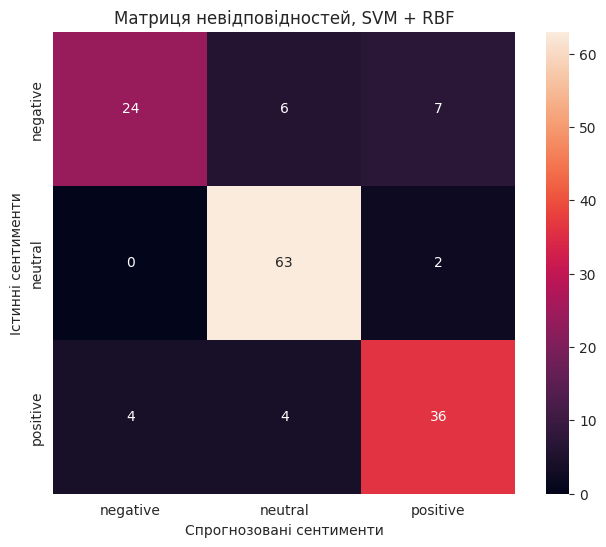

In [36]:
axes = subplots(figsize=(8, 6))[1]
matrix = confusion_matrix(test_sentiments, predicted_sentiments)
labels = rbf_svm_cv.best_estimator_['svc'].classes_
chart = heatmap(
    matrix,
    annot=True,
    ax=axes,
    vmin=0,
    fmt='d',
    square=True
)
chart.set_xticklabels(labels)
chart.set_yticklabels(labels)
axes.set_title('–ú–∞—Ç—Ä–∏—Ü—è –Ω–µ–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—Å—Ç–µ–π, SVM + RBF')
axes.set_xlabel('–°–ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏')
axes.set_ylabel('–Ü—Å—Ç–∏–Ω–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏');

## –õ—ñ–Ω—ñ–π–Ω–∏–π SVM

–£ –ª—ñ–Ω—ñ–π–Ω–æ–º—É SVC –∑–∞–º—ñ—Å—Ç—å –∑–º–µ–Ω—à–µ–Ω–Ω—è —Ä–æ–∑–º—ñ—Ä–Ω–æ—Å—Ç—ñ –¥–ª—è –ø–æ–∫—Ä–∞—â–µ–Ω–Ω—è –∑–±—ñ–∂–Ω–æ—Å—Ç—ñ –ø–æ—Å—Ç–∞–≤–∏–º–æ –º–∞—Å—à—Ç–∞–±—É–≤–∞–Ω–Ω—è –æ–∑–Ω–∞–∫, —è–∫–µ –∑–±–µ—Ä—ñ–≥–∞—î
—Ä–æ–∑—Ä—ñ–¥–∂–µ–Ω—ñ—Å—Ç—å –≤–≤–µ–¥–µ–Ω–Ω—è.

In [37]:
linear_svm_pipeline = make_pipeline(CountVectorizer(), StandardScaler(with_mean=False), SVC(kernel='linear'))

In [38]:
linear_svm_distributions = {'svc__C': 10.0 ** arange(-2, 3, 1), 'svc__gamma': ['scale', 'auto']}

In [39]:
linear_svm_cv = GridSearchCV(linear_svm_pipeline, linear_svm_distributions, n_jobs=8, cv=5)

In [40]:
%%time
linear_svm_cv.fit(train_messages, train_sentiments);

CPU times: user 84.1 ms, sys: 3.54 ms, total: 87.7 ms
Wall time: 254 ms


In [41]:
linear_svm_cv.best_score_

0.7785527690700104

In [42]:
linear_svm_cv.best_params_

{'svc__C': 0.01, 'svc__gamma': 'scale'}

In [43]:
predicted_sentiments = linear_svm_cv.best_estimator_.predict(test_messages)

In [44]:
accuracy_score(test_sentiments, predicted_sentiments)

0.8287671232876712

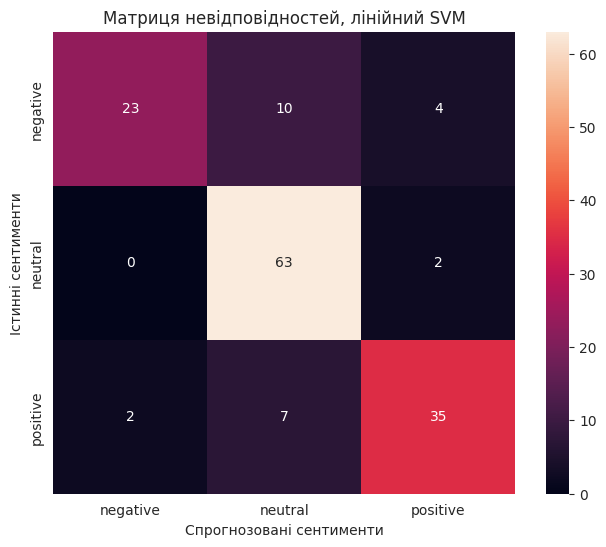

In [45]:
axes = subplots(figsize=(8, 6))[1]
matrix = confusion_matrix(test_sentiments, predicted_sentiments)
labels = linear_svm_cv.best_estimator_['svc'].classes_
chart = heatmap(
    matrix,
    annot=True,
    ax=axes,
    vmin=0,
    fmt='d',
    square=True
)
chart.set_xticklabels(labels)
chart.set_yticklabels(labels)
axes.set_title('–ú–∞—Ç—Ä–∏—Ü—è –Ω–µ–≤—ñ–¥–ø–æ–≤—ñ–¥–Ω–æ—Å—Ç–µ–π, –ª—ñ–Ω—ñ–π–Ω–∏–π SVM')
axes.set_xlabel('–°–ø—Ä–æ–≥–Ω–æ–∑–æ–≤–∞–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏')
axes.set_ylabel('–Ü—Å—Ç–∏–Ω–Ω—ñ —Å–µ–Ω—Ç–∏–º–µ–Ω—Ç–∏');

## –í–∏—Å–Ω–æ–≤–∫–∏

–ü–æ—Ä–æ–ø–æ–Ω—É—é –ø–æ–≥–ª—è–Ω—É—Ç–∏ –Ω–∞ –∫—ñ–Ω—Ü–µ–≤—É —Ç–æ—á–Ω—ñ—Å—Ç—å –º–æ–¥–µ–ª–µ–π –Ω–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—ñ–π —Ç–∞ —Ç–µ—Å—Ç–æ–≤—ñ–π –≤–∏–±—ñ—Ä–∫–∞—Ö:

–¢–æ—á–Ω—ñ—Å—Ç—å|–õ–æ–≥—ñ—Å—Ç–∏—á–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è|–í–∏–ø–∞–¥–∫–æ–≤–∏–π –ª—ñ—Å|SVM + RBF|–ª—ñ–Ω—ñ–π–Ω–∏–π SVM|
|---|---:|---:|---:|---:|
|–í–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω–∞|0.790|0.747|0.792|0.779|
|–¢–µ—Å—Ç–æ–≤–∞|0.849|0.801|0.842|0.829|

–Ø–∫ –±–∞—á–∏–º–æ, –Ω–∞–π–∫—Ä–∞—â–µ –ø—Ä–æ–≥–Ω–æ–∑—É—î –ª–æ–≥—ñ—Å—Ç–∏—á–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è, –Ω–∞–π–≥—ñ—Ä—à–µ ‚Äî –≤–∏–ø–∞–¥–∫–æ–≤–∏–π –ª—ñ—Å. –†—ñ–∑–Ω–∏—Ü—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏–≤–Ω–æ—Å—Ç—ñ —ñ—Å—Ç–æ—Ç–Ω–∞,
–≤—ñ–¥—Å–æ—Ç–∫–∏ —Ç–æ—á–Ω–æ—Å—Ç—ñ. –í —É—Å—ñ—Ö –∞–ª–≥–æ—Ä–∏—Ç–º—ñ–≤ —Ç–µ—Å—Ç–æ–≤–∞ –º–µ—Ç—Ä–∏–∫–∞ –±—ñ–ª—å—à–∞ –∑–∞ –≤–∞–ª—ñ–¥–∞—Ü—ñ–π–Ω—É. –¢–∞–∫–æ–∂ —Ö–∞—Ä–∞–∫—Ç–µ—Ä–Ω–æ —Ç–µ, —â–æ –≤—Å—ñ –ø–æ—Å–ª—É–≥–æ–≤—É–≤–∞–ª–∏—Å—è
–≤–∏–∫–ª—é—á–Ω–æ —É–Ω—ñ–≥—Ä–∞–º–∞–º–∏. –û–¥–Ω–∞ –∑ –Ω–∞–π–±—ñ–ª—å—à —á–∏—Å–µ–ª—å–Ω–∏—Ö –ø–æ–º–∏–ª–æ–∫ ‚Äî –∫–æ–ª–∏ –Ω–µ–≥–∞—Ç–∏–≤–Ω—ñ –≤—ñ–¥–≥—É–∫–∏ –≤–≤–∞–∂–∞—é—Ç—å—Å—è –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–∏–º–∏. –ú–æ–∂–ª–∏–≤–æ, –Ω–∞–¥—Ç–æ
—Ä—ñ–¥–∫—ñ—Å–Ω—ñ –æ–∑–Ω–∞–∫–∏, –∞–±–æ –∂ –Ω–µ–¥–æ—Å—Ç–∞—Ç–Ω—å–æ —Ç–æ–∫—Å–∏—á–Ω—ñ :) –í —Ü—ñ–ª–æ–º—É, –≤–∏–±—ñ—Ä–∫–∞ —î –∑–∞–Ω–∞–¥—Ç–æ –º–∞–ª–µ–Ω—å–∫–æ—é, –∞–±–∏ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏ –Ω–∞ –Ω—ñ–π –≤–≤–∞–∂–∞–ª–∏—Å—è
–¥–æ—Å—Ç–æ–≤—ñ—Ä–Ω–∏–º–∏. 